In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile 

regions_map = {
        "PHA": "00",
        "STC": "01",
        "JHC": "02",
        "PLK": "03",
        "ULK": "04",
        "HKK": "05",
        "JHM": "06",
        "MSK": "07",
        "OLK": "14",
        "ZLK": "15",
        "VYS": "16",
        "PAK": "17",
        "LBK": "18",
        "KVK": "19",
    }
# swap keys and values
regions_map = {v: k for k, v in regions_map.items()}
my_regions = ["PHA", "STC", "JHM", "PLK"]



In [3]:
# Ukol 1: nacteni dat ze ZIP souboru
def load_data(filename : str) -> pd.DataFrame:
    # tyto konstanty nemente, pomuzou vam pri nacitani
    headers = ["p1", "p36", "p37", "p2a", "weekday(p2a)", "p2b", "p6", "p7", "p8", "p9", "p10", "p11", "p12", "p13a",
                "p13b", "p13c", "p14", "p15", "p16", "p17", "p18", "p19", "p20", "p21", "p22", "p23", "p24", "p27", "p28",
                "p34", "p35", "p39", "p44", "p45a", "p47", "p48a", "p49", "p50a", "p50b", "p51", "p52", "p53", "p55a",
                "p57", "p58", "a", "b", "d", "e", "f", "g", "h", "i", "j", "k", "l", "n", "o", "p", "q", "r", "s", "t", "p5a"]
    #def get_dataframe(filename: str, verbose: bool = False) -> pd.DataFrame:
    regions = {
        "PHA": "00",
        "STC": "01",
        "JHC": "02",
        "PLK": "03",
        "ULK": "04",
        "HKK": "05",
        "JHM": "06",
        "MSK": "07",
        "OLK": "14",
        "ZLK": "15",
        "VYS": "16",
        "PAK": "17",
        "LBK": "18",
        "KVK": "19",
    }

    df = pd.DataFrame()
    with zipfile.ZipFile(filename, "r") as zip_ref:
        for file in zip_ref.namelist():
            if file.endswith(".zip"):
                print("\n",file, " ", end="")
                with zipfile.ZipFile(zip_ref.open(file), "r") as zip_ref2:
                    for file2 in zip_ref2.namelist():
                        print(".", end="")
                        if file2.endswith(".csv"):
                            if file2 == "CHODCI.csv":
                                continue
                            if zip_ref2.getinfo(file2).file_size == 0:
                                continue
                            dataframe = pd.read_csv(zip_ref2.open(file2), encoding='cp1250', delimiter=";", low_memory=False)
                            dataframe.columns = headers
                            dataframe["region"] = file2[0:2]
                            # change values in column "region" from numbers to names of regions (PHA, STC, ...) 
                            # dataframe["region"] = dataframe["region"].replace(regions)
                            
                            df = pd.concat([df, dataframe])
    df['region'] = df['region'].replace(regions_map)
    # df['region'] = df['region'].map(regions)
    print("\n", df.shape)
    print("success")

    return df

In [4]:
# Ukol 2: zpracovani dat
def parse_data(df : pd.DataFrame, verbose : bool = False) -> pd.DataFrame:
    df2 = df.copy()
    orig_size = round(df2.memory_usage(index=False, deep=True).sum() / 1000000, 1)

    category_cols = ["k", "p", "q", "t", "l", "i", "h"]
    float_cols = [ 'a', 'b', 'd', 'e', 'f', 'g', 'n', 'o']

    df2[category_cols] = df2[category_cols].astype("category")
    df2[float_cols] = df2[float_cols].replace("[^0-9]", np.nan, regex=True)
    df2[float_cols] = df2[float_cols].replace(",", ".", regex=True)
    df2[float_cols] = df2[float_cols].astype("float64")

    df2.rename(columns={'p2a': 'date'}, inplace=True)
    df2['date'] = pd.to_datetime(df2['date'])
    df2 = df2.drop_duplicates(subset=["p1"], keep="first")
    new_size = round(df2.memory_usage(index=False, deep=True).sum() / 1000000, 1)

    if (verbose):
        print(f"orig_size={orig_size} MB")
        print(f"new_size={new_size} MB")
    print("success")

    return df2

In [5]:
# Ukol 3: počty nehod v jednotlivých regionech podle viditelnosti
def plot_visibility(df: pd.DataFrame, fig_location: str = None,
                    show_figure: bool = False):


    # pd.melt(df, id_vars=['region'], value_vars=['p19'])

    # data = df[df['region'].isin(my_regions)]
    # data = data.groupby(['region', 'p19']).size().reset_index(name='count')
    # data = data.pivot(index='region', columns='p19', values='count')
    # data = data.fillna(0)
    # data = data.astype(int)

    # data[2] = data[2] + data[3]
    # data[4] = data[4] + data[6]
    # data[5] = data[5] + data[7]
    # data = data.drop([3, 6, 7], axis=1)

    # fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))
    # fig.suptitle("Počet nehod dle viditelnosti", fontsize=12)
    # fig.subplots_adjust(hspace=0.2, top=0.91, bottom=0.05)
    # fig.patch.set_facecolor('#FFFFFF')

    # den_nezhorsena = data[1]
    # den_zhorsena = data[2]
    # noc_nezhorsena = data[4]
    # noc_zhorsena = data[5]

    # # noc nezhorsena plot
    # graph1 = sns.barplot(x=noc_nezhorsena.index, y=noc_nezhorsena.values, ax=ax1)
    # graph1.set_title("Viditelnost: v noci - nezhoršená", fontsize=10)
    # graph1.set_ylabel("Počet nehod")
    # graph1.set_facecolor('#cccccc')
    # graph1.grid(color='#000000', linestyle='-', linewidth=1, axis='y', alpha=0.3)  

    # graph1.spines['top'].set_visible(False)
    # graph1.spines['right'].set_visible(False)
    # graph1.spines['bottom'].set_visible(False)
    # graph1.spines['left'].set_visible(False)
    # graph1.set_xlabel("Kraj")
    # graph1.set_xticklabels([x for x in my_regions])
    # graph1.tick_params(left=False, bottom=False)

    # # noc zhorsena plot
    # graph2 = sns.barplot(x=noc_zhorsena.index, y=noc_zhorsena.values, ax=ax2)
    # graph2.set_title("Viditelnost: v noci - zhoršená", fontsize=10)
    # graph2.set_facecolor('#cccccc')
    # graph2.grid(color='#000000', linestyle='-', linewidth=1, axis='y', alpha=0.3)

    # graph2.spines['top'].set_visible(False)
    # graph2.spines['right'].set_visible(False)
    # graph2.spines['bottom'].set_visible(False)
    # graph2.spines['left'].set_visible(False)

    # graph2.set_xlabel("Kraj")
    # graph2.set_ylabel("Počet nehod")
    # graph2.set_xticklabels([x for x in my_regions])
    # graph2.tick_params(left=False, bottom=False)
    
    # # den nezhorsena plot
    # graph3 = sns.barplot(x=den_nezhorsena.index, y=den_nezhorsena.values, ax=ax3)
    # graph3.set_title("Viditelnost: ve dne - nezhoršená", fontsize=10)
    # graph3.set_ylabel("Počet nehod")
    # graph3.set_facecolor('#cccccc')
    # graph3.grid(color='#000000', linestyle='-', linewidth=1, axis='y', alpha=0.3)

    # graph3.spines['top'].set_visible(False)
    # graph3.spines['right'].set_visible(False)
    # graph3.spines['bottom'].set_visible(False)
    # graph3.spines['left'].set_visible(False)
    
    # graph3.set_xlabel("Kraj")
    # graph3.set_xticklabels([x for x in my_regions])
    # graph3.tick_params(left=False, bottom=False)

    # # den zhorsena plot
    # graph4 = sns.barplot(x=den_zhorsena.index, y=den_zhorsena.values, ax=ax4)
    # graph4.set_title("Viditelnost: ve dne - zhoršená", fontsize=10)
    # graph4.set_facecolor('#cccccc')
    # graph4.grid(color='#000000', linestyle='-', linewidth=1, axis='y', alpha=0.3)

    # graph4.spines['top'].set_visible(False)
    # graph4.spines['right'].set_visible(False)
    # graph4.spines['bottom'].set_visible(False)
    # graph4.spines['left'].set_visible(False)

    # graph4.set_xlabel("Kraj")
    # graph4.set_ylabel("Počet nehod")
    # graph4.set_xticklabels([x for x in my_regions])
    # graph4.tick_params(left=False, bottom=False)
    
    # # make bars transparent
    # for i in range(4):
    #     for j in range(4):
    #         for p in fig.axes[i].patches:
    #             p.set_alpha(0.9)
    # if show_figure:
    #     plt.show()

    # if fig_location is not None:
    #     plt.savefig(fig_location, dpi=600, bbox_inches='tight')
    # plt.close()
    pd.melt(df, id_vars=['region'], value_vars=['p19'])

    data = df[df['region'].isin(my_regions)]
    data = data.groupby(['region', 'p19']).size().reset_index(name='count')
    data = data.pivot(index='region', columns='p19', values='count')
    data = data.fillna(0)
    data = data.astype(int)

    data[2] = data[2] + data[3]
    data[4] = data[4] + data[6]
    data[5] = data[5] + data[7]
    data = data.drop([3, 6, 7], axis=1)

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))
    fig.suptitle("Počet nehod dle viditelnosti", fontsize=12)
    fig.subplots_adjust(hspace=0.2, top=0.91, bottom=0.05)
    fig.patch.set_facecolor('#FFFFFF')

    den_nezhorsena = data[1]
    den_zhorsena = data[2]
    noc_nezhorsena = data[4]
    noc_zhorsena = data[5]

    # plots
    for i, ax in enumerate(fig.axes):
        if i == 0:
            ax = sns.barplot(x=noc_nezhorsena.index, y=noc_nezhorsena.values, ax=ax1)
            ax.set_title("Viditelnost: v noci - nezhoršená", fontsize=10)
        elif i == 1:
            ax = sns.barplot(x=noc_zhorsena.index, y=noc_zhorsena.values, ax=ax2)
            ax.set_title("Viditelnost: v noci - zhoršená", fontsize=10)
        elif i == 2:
            ax = sns.barplot(x=den_nezhorsena.index, y=den_nezhorsena.values, ax=ax3)
            ax.set_title("Viditelnost: ve dne - nezhoršená", fontsize=10)
        elif i == 3:
            ax = sns.barplot(x=den_zhorsena.index, y=den_zhorsena.values, ax=ax4)
            ax.set_title("Viditelnost: ve dne - zhoršená", fontsize=10)
        ax.set_ylabel("Počet nehod")
        ax.set_facecolor('#cccccc')
        ax.grid(color='#000000', linestyle='-', linewidth=1, axis='y', alpha=0.3)  

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xlabel("Kraj")
        ax.set_xticklabels([x for x in my_regions])
        ax.tick_params(left=False, bottom=False)
        ax.set_alpha(0.9)
    

    if show_figure:
        plt.show()

    if fig_location is not None:
        plt.savefig(fig_location, dpi=600, bbox_inches='tight')
    plt.close()



In [85]:
# Ukol4: druh srážky jedoucích vozidel
def plot_direction(df: pd.DataFrame, fig_location: str = None, show_figure: bool = False):

    df1 = [None] * 4
    for i, region in enumerate(my_regions):
        df1[i] = df[df["region"] == region].copy()
        df1[i]["month"] = df1[i]["date"].dt.month
        df1[i] = df1[i].groupby(["month", "p7"])["p7"].count().unstack().sort_index()
        df1[i][2] = df1[i][2] + df1[i][3]
        df1[i] = df1[i].drop(columns=[3])
        df1[i] = df1[i].drop(columns=[0])
        df1[i] = df1[i].rename(columns={2: "boční", 4: "zezadu", 1: "čelní"})
        df1[i] = pd.melt(df1[i].reset_index(), id_vars=["month"])
        df1[i] = df1[i].rename(columns={"month": "Měsíc", "variable": "směr", "value": "Počet nehod", "p7": "Druh srážky"})
        df1[i]["Druh srážky"] = pd.Categorical(df1[i]["Druh srážky"], categories=["boční", "zezadu", "čelní"], ordered=True)

    
    fig, ((graph1, graph2), (graph3, graph4)) = plt.subplots(2, 2, figsize=(20, 10))
    plt.subplots_adjust(hspace=0.3)


    graph1 = sns.barplot(x="Měsíc", y="Počet nehod", hue="Druh srážky", data=df1[0], ax=graph1)
    graph1.set_title("Kraj: {}".format(my_regions[0]))
    graph1.legend_.remove()

    # plot 2
    graph2 = sns.barplot(x="Měsíc", y="Počet nehod", hue="Druh srážky", data=df1[1], ax=graph2)
    graph2.set_title("Kraj: {}".format(my_regions[1]))
    graph2.legend_.remove()

    # plot 3
    graph3 = sns.barplot(x="Měsíc", y="Počet nehod", hue="Druh srážky", data=df1[2], ax=graph3)
    graph3.set_title("Kraj: {}".format(my_regions[2]))
    graph3.legend_.remove()

    # plot 4
    graph4 = sns.barplot(x="Měsíc", y="Počet nehod", hue="Druh srážky", data=df1[3], ax=graph4)
    graph4.set_title("Kraj: {}".format(my_regions[3]))
    graph4.legend_.remove()

    for i, ax in enumerate(fig.axes):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    plt.legend(bbox_to_anchor=(1.05, 1.3), loc=2, borderaxespad=0., ncol=1, title="Druh srážky", frameon=True, facecolor="white", edgecolor="white")
   
    if show_figure:
        plt.show()

    if fig_location is not None:
        plt.savefig(fig_location, dpi=600, bbox_inches='tight')
    plt.close()

   


In [7]:
def plot_consequences_mine(df: pd.DataFrame, show_figure: bool = False, fig_location: str = None):
    my_regions = ["01", "02", "03", "04"]
    df1 = df.copy()
    labels = ["Usmrcení", "Težké zranění", "Lehké zranění"]

    # categorize and label data in df1. column "p13a" is Usmrcení, "p13b" is Težké zranění, "p13c" is Lehké zranění
    # df1["p13a"] = df1["p13a"].astype("category")
    # df1["p13a"] = df1["p13a"].cat.rename_categories(labels)
    # df1["p13b"] = df1["p13b"].astype("category")
    # df1["p13b"] = df1["p13b"].cat.rename_categories(labels)
    # df1["p13c"] = df1["p13c"].astype("category")
    # df1["p13c"] = df1["p13c"].cat.rename_categories(labels)

    # create new column "p13" which is a combination of "p13a", "p13b" and "p13c"
    df1["conseq"] = df1["p13a"].astype(str) + ", " + df1["p13b"].astype(str) + ", " + df1["p13c"].astype(str)

    # consider only years before 2022
    data = df1[df1["region"].isin(my_regions)
              & (df1["conseq"] != 0) & (df1["date"].dt.year < 2022)
              ]

   # make a pivot table
    data = pd.pivot_table(data, columns=["conseq"], values="p1",
                          index=["region", "date"], aggfunc="count")
    print(data)
    # rearrange index to match the desired index in the next step
    target = data.stack(level="conseq").unstack(level="region")
    print(target)
    # resample for every region and store in the target dataframe
    for i, region in enumerate(my_regions):
        tmp = data.loc[region].resample("M").sum()
        target[region] = tmp.stack(level="conseq")

    print(target)
    # drop nans, stack the region and reset the index to expand the dataframe
    target.dropna(how='all', inplace=True)
    target = target.stack(level="region").reset_index()

    # plot
    s = sns.relplot(data=target, x="date", y=0,
                    hue="conseq", col="region",
                    col_wrap=2, kind="line",
                    height=2.5, aspect=1.4)

    s.set_titles("Kraj: {col_name}")
    s.set_xlabels("")
    s.set_ylabels("Počet nehôd")
    s.legend.set(title="Podmienky")
    s.set(xmargin=0)
    s.set(xticks=[f"20{year}-01" for year in range(16, 23)])
    s.set_xticklabels([f"01/{year}" for year in range(16, 23)])
    s.tight_layout()

    



In [82]:
def plot_consequences(df: pd.DataFrame, fig_location: str = None, show_figure: bool = False):
    
    df1 = df.copy()
    labels = ["Lehké zranení", "Težké zranění", "Usmrcení"]

    df1["conseq"] = df1["p13c"] + df1["p13b"] + df1["p13a"]
    df1["conseq"] = pd.cut(df1["conseq"], [i for i in range(4)],labels=labels)

    data = df1[df1["region"].isin(my_regions) & (df1["p13c"] != 0) & (df1["date"].dt.year < 2022)]

    data = pd.pivot_table(data, columns=["conseq"], values="p1", index=["region", "date"], aggfunc="count")

    target = data.stack(level="conseq").unstack(level="region")

    for i, region in enumerate(my_regions):
        target[region] = data.loc[region].resample("M").sum().stack(level="conseq")

    target = target.stack(level="region").reset_index()

    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    sns.set_style("darkgrid")
    sns.despine(top=True, bottom=True, left=True, right=True)
    for i, region in enumerate(my_regions):
        ax = axs[i // 2, i % 2]
        sns.lineplot(data=target[target["region"] == region],
                     x="date", y=0, hue="conseq", ax=ax)
        # ax.facecolor = "lightgrey"
        ax.set_title(f"Kraj: {region}")
        ax.set_xlabel("Kraj")
        if i % 2 == 0:
            ax.set_ylabel("Počet nehôd")
        else:
            ax.set_ylabel("")
        ax.legend_.remove()
        ax.set_xticks([f"20{year}-01" for year in range(16, 23)])
        ax.set_xticklabels([f"01/{year}" for year in range(16, 23)])
        ax.set_ylim(0, 300)
        ax.set_facecolor("#EAEAF2")

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Následky", loc="center right",facecolor="white", edgecolor="white")

    if show_figure:
        plt.show()

    if fig_location is not None:
        plt.savefig(fig_location, dpi=600, bbox_inches='tight')
    plt.close()


In [84]:
plot_consequences(df2, "3.png", False)

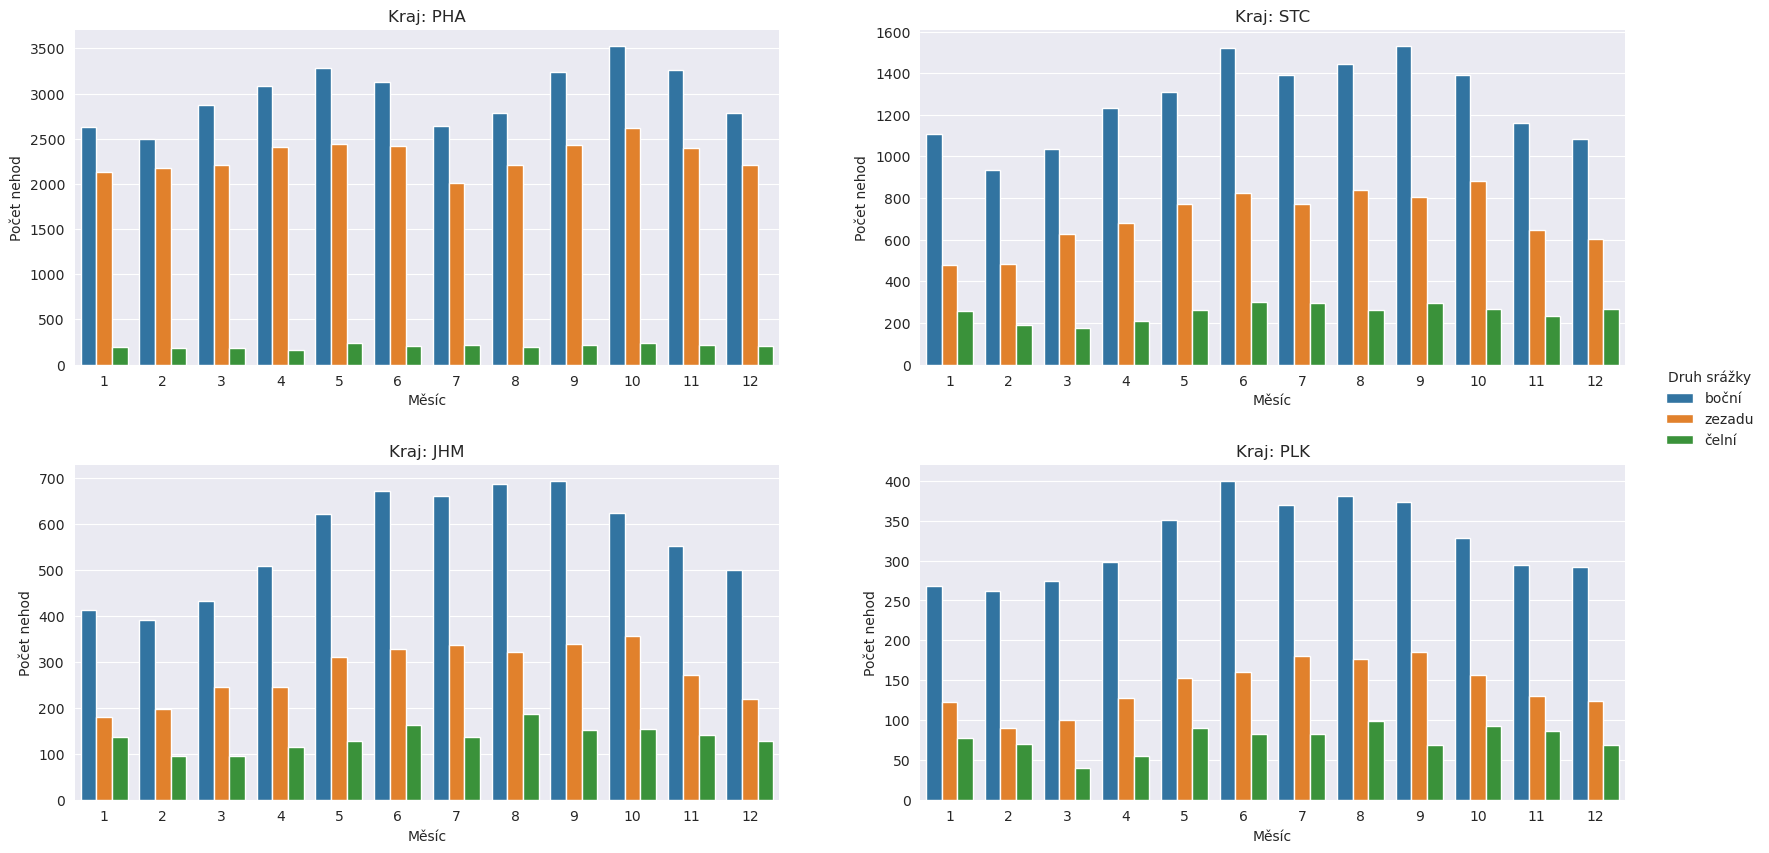

In [86]:
plot_direction(df2, None, True)

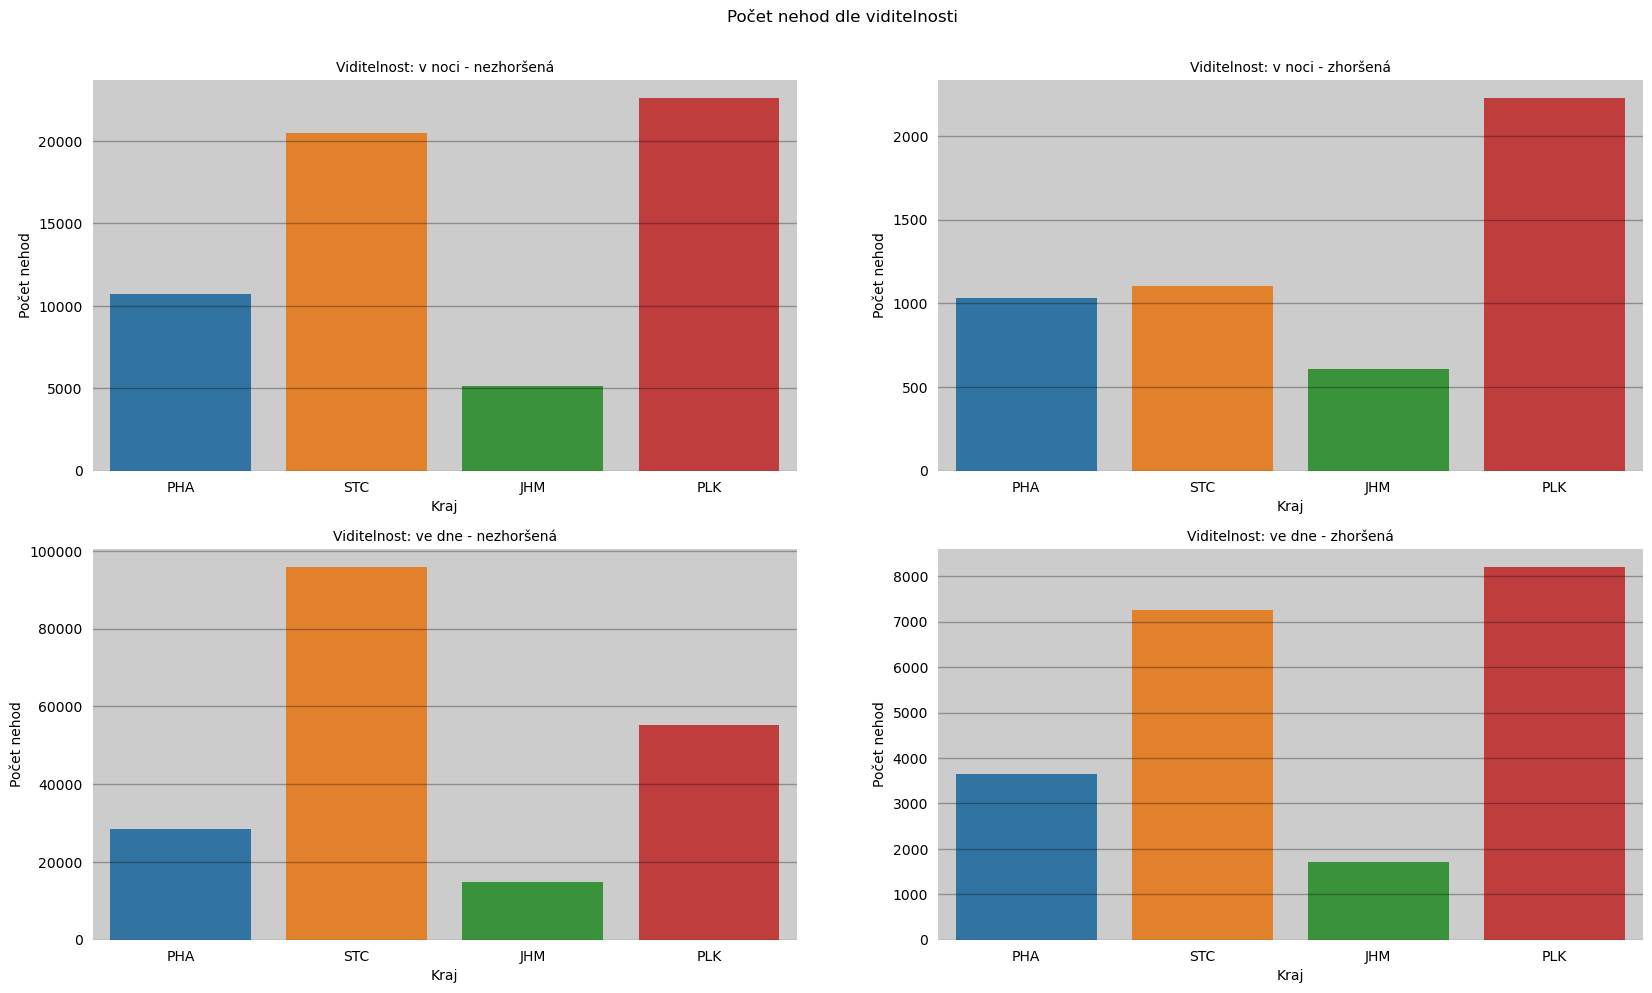

In [13]:
plot_visibility(df2, None, show_figure=True)

In [10]:
df = load_data("data/data.zip")


 2016.zip  .....................
 2017.zip  .....................
 2018.zip  .....................
 2019.zip  .....................
 2020.zip  .....................
 2021.zip  .....................
 (609066, 65)
success


In [11]:
print(df['region'])
# df3 = df.copy()
# # replace region number with region name from regions_map dictionary
# df3['region'] = df3['region'].replace(regions_map)


# # change visibility from numbers to names
# print(df3["region"])

0       PHA
1       PHA
2       PHA
3       PHA
4       PHA
       ... 
2460    KVK
2461    KVK
2462    KVK
2463    KVK
2464    KVK
Name: region, Length: 609066, dtype: object


In [12]:
df2 = parse_data(df, True)

orig_size=941.3 MB
new_size=356.8 MB
success


In [ ]:
print(df2['region'])

0       PHA
1       PHA
2       PHA
3       PHA
4       PHA
       ... 
2460    KVK
2461    KVK
2462    KVK
2463    KVK
2464    KVK
Name: region, Length: 609062, dtype: object


In [ ]:
print(df2.dtypes.value_counts())

int64             32
float64           23
object             2
datetime64[ns]     1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
dtype: int64
